In [1]:
import numpy as np
import random 
import math
from pyswarms.utils.functions.single_obj import rosenbrock_func
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt

In [2]:
"""
RLS function used to update weights
"""
def RLS (actual, inp, weight, r_k_inv ):
    #r_k_inv = 1000*np.identity(np.shape(i)[0])
    # actual output inp and weight are matrices
    y_not = np.matmul(weight ,inp)
    error = actual - y_not
    z_k = np.matmul(r_k_inv, inp)
    q = np.matmul(inp.T , z_k)
    v = 1/(1 + q)
    z_k_tilde = v * z_k
    w_new = weight + error * z_k_tilde.T
    r_new_inv = r_k_inv - np.matmul(z_k_tilde, z_k_tilde.T)
    #print(np.shape(y_not),np.shape(error),np.shape(z_k),np.shape(q),np.shape(v),np.shape(z_k_tilde),np.shape(w_new), np.shape(r_k_inv))
    return w_new, r_new_inv

In [3]:
# for constants 0.2, 0.7, 0.2 with alpha = 0.01
weights = [[np.random.randn(),np.random.randn(),np.random.randn()]]
#print(np.shape(weights))
#print(weights)
first = 0
last = 100
num1 = 1000
error = 0
errors = []
numbers = 3
count = 0
diff = (last - first)/num1
r_k_inv = 100*np.identity(numbers)
for each in np.linspace(first, last, num=num1):
    count = count + 1
    actual = 0.2 * each + 0.7 * (each - diff) + 0.2 * (each - 2 * diff)
    inp = np.asarray([[each], [each - diff], [each - 2 * diff]])
    #print(np.shape(inp))
    output = weights[0][0] * each + weights[0][1] * (each - diff) + weights[0][2] * (each - 2 * diff)
    #print(actual, output, weights, each)
    weights, r_k_inv = RLS(actual, inp, weights, r_k_inv)
    error = abs(output - actual)
    if abs(output - actual) <= 0.0000001:
        print("Ended on iteration ", count)
        break
    if each != 0:
        errors.append(error)
print("Total Iteration ", count)
print("Final Weights :-", weights)
print("Error After full Training", error)
#print(errors)

Total Iteration  1000
Final Weights :- [[ 0.37155894  0.31957708  0.40890136]]
Error After full Training 3.74547747128e-06


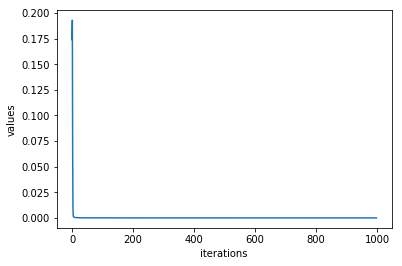

In [4]:
plt.plot(errors)
plt.ylabel('values')
plt.xlabel('iterations')
plt.show()

In [5]:
# for constants 0.3, 0.4, 0.1, 0.8 with alpha 0.01

weights = [[np.random.randn(),np.random.randn(),np.random.randn(), np.random.randn()]]
#print(np.shape(weights))
#print(weights)
first = 0
last = 100
num1 = 1000
error = 0
errors = []
numbers = 4
count = 0
diff = (last - first)/num1
r_k_inv = 100*np.identity(numbers)
for each in np.linspace(first, last, num=num1):
    count = count + 1
    actual = 0.3 * each + 0.4 * (each - diff) + 0.1 * (each - 2 * diff) + 0.8 * (each - 3 * diff)
    output = weights[0][0] * each + weights[0][1] * (each - diff) + weights[0][2] * (each - 2 * diff) + weights[0][3] * (each - 3 * diff)
    inp = np.asarray([[each], [each - diff], [each - 2 * diff], [each - 3*diff]])
    #print(np.shape(inp))
    #print(actual, output, weights, each)
    weights, r_k_inv = RLS(actual, inp, weights, r_k_inv)
    error = abs(output - actual)
    if abs(output - actual) <= 0.0000001:
        print("Ended on iteration ", count)
        break
    if each != 0:
        errors.append(error)
print("Total Iteration ", count)
print("Final Weights :-", weights)
print("Error After full Training", error)
#print(errors)

Total Iteration  1000
Final Weights :- [[ 0.10436467  1.35738001  0.61625805 -0.47985239]]
Error After full Training 0.000185337126624


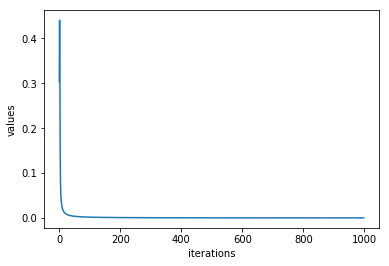

In [6]:
plt.plot(errors)
plt.ylabel('values')
plt.xlabel('iterations')
plt.show()